In [ ]:
# Install new package
!pip install beautifulsoup4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# OVERVIEW

I) Prepare categories and Website for downloading images

II) Get link and add into .txt files

III) From link in .txt files, download images to folders

IV) Data cleaning

V) Store dataset

# I) Prepare categories and Website for downloading images

In [ ]:
# We create 4 lists of categories

animal  =  ["Monkey",  "Elephant",  "cows",  
"Cat",  "Dog",  "bear",  "fox",  "Civet", 
"Pangolins", "Rabbit", "Bats", "Whale", 
"Cock", "Owl", "flamingo", "Lizard", "Turtle", 
"Snake", "Frog", "Fish", "shrimp", "Crab", "Snail", 
"Coral", "Jellyfish", "Butterfly", "Flies", "Mosquito", 
"Ants", "Cockroaches", "Spider", "scorpion", "tiger", 
"bird",  "horse", "pig", "Alligator" ,"Alpaca" , 
"Anteater", "donkey", "Bee", "Buffalo", "Camel", 
"Caterpillar", "Cheetah", "Chicken",  "Dragonfly", 
"Duck", "panda", "Giraffe"]

plant = ["Bamboo", "Apple", "Apricot", "Banana", "Bean", 
"Wildflower", "Flower", "Mushroom", "Weed", "Fern" , "Reed", 
"Shrub", "Moss", "Grass", "Palm_tree", "Corn", "Tulip", "Rose",
"Clove", "Dogwood", "Durian", "Ferns", "Fig", "Flax", "Frangipani", 
"Lantana", "Hibiscus", "Bougainvillea", "Pea", "Orchid_Tree", "Rangoon_Creeper",
"Jack_fruit", "Cotton_plant", "Cornelian_tree", "Coffee_plant", "Coconut"
, "wheat", "watermelon", "radish", "carrot"]

furniture = ["bed", "cabinet", "chair", "chests", "clock", 
"desks", "table", "Piano", "Bookcase", "Umbrella", "Clothes", 
"cart", "sofa", "ball", "spoon", "Bowl", "fridge", "pan", "book"]

scenery = ["Cliff", "Bay", "Coast", "Mountains", "Forests", 
"Waterbodies", "Lake", "desert", "farmland", "river", "hedges", 
"plain", "sky", "cave", "cloud", "flower_garden", "glacier", 
"grassland", "horizon", "lighthouse", "plateau", "savannah", "valley", "volcano", "waterfall"]

In [ ]:
'''
Web link form:
f"https://www.freepik.com/search?from_query={name}&query={name}&sort=popular&type=photo&page="
f"https://www.freeimages.com/search/{name}/"
'''

'\nWeb link form:\nf"https://www.freepik.com/search?from_query={name}&query={name}&sort=popular&type=photo&page="\nf"https://www.freeimages.com/search/{name}/"\n'

# II) Get link and add into .txt files

In [ ]:
from bs4 import BeautifulSoup # parse HTML
from urllib.parse import urljoin, urlparse # check link valid
import urllib.request # Download images to folders
import threading # multi threading programming
import time # Compute time

## Get link

In [ ]:
def is_valid(url):
    """
    Checks whether `url` is a valid URL.
    """
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)

In [ ]:
"""
    args:
        - Web link
    
    Returns:
        all image URLs on a single `url`
"""
def get_all_images(url):
  #Read .html file of the current site
  soup = BeautifulSoup(urllib.request.urlopen(url), "html.parser")
  urls = []   # List of all image URLS

  # All tags with 'img' element
  for img in soup.find_all('img'):
    img_url = img.attrs.get('src')   # Contain 'src' attribute 

    if not img_url:
        # if img does not contain src attribute, just skip
        continue

    # make the URL absolute by joining domain with the URL that is just extracted
    img_url = urljoin(url, img_url)

    # remove URLs like '/hsts-pixel.gif?c=3.2.5'
    try:
        pos = img_url.index("?")
        img_url = img_url[:pos]
    except ValueError:
        pass

    # finally, if the url is valid
    if is_valid(img_url):
        urls.append(img_url)   #Append to url list

  #print(".", end = ' ')
  return urls

In [ ]:
'''
Test:

name = 'dog'
page = 2
url = f"https://www.freepik.com/search?from_query={name}&query={name}&sort=popular&type=photo&page={page}"


soup = BeautifulSoup(urllib.request.urlopen(url), "html.parser")
get_all_images(url)

'''

'\nTest:\n\nname = \'dog\'\npage = 2\nurl = f"https://www.freepik.com/search?from_query={name}&query={name}&sort=popular&type=photo&page={page}"\n\n\nsoup = BeautifulSoup(urllib.request.urlopen(url), "html.parser")\nget_all_images(url)\n\n'

## Add url links to .txt files by multi threading

In [ ]:
class checkTimeThread():
    def __init__(self, nThreads, npage, urltopic):
        self.nThreads = nThreads
        self.ExcuteThread = None
        self.result = []
        self.npage = npage
        self.urltopic = urltopic
    

    # Func target
    def main(self, start, end):
        for i in range(start,end):
            try:
                self.result.extend(get_all_images(self.urltopic+str(i)))
            except:
                pass


    def __call__(self):    
        # Create Threads
        threads = []
        
        #======
        batch = self.npage//self.nThreads
        for i in range(1, self.npage, batch):
            start = i
            end = i + batch
           
            if end >= self.npage:
                end = self.npage + 1

            threads.append(threading.Thread(target=self.main, args = (start, end)))
        
        #======
        start = time.time()
        for i in range(self.nThreads):
            threads[i].start()
        for i in range(self.nThreads):
            threads[i].join()
        end = time.time()
    
        self.ExcuteThread = end - start
    
        return self.result  # Assign when calling
        
    def __str__(self):
        return f"Excute with {self.nThreads} Threads = {self.ExcuteThread} s\n"

In [ ]:
'''
Test:

nThreads = 3
npage = 6
name = animal[0]

# nThreads = min(nThreads, npage//2) to make sure there is at least two threads
result = checkTimeThread(min(nThreads, npage//2), npage, 
                         f"https://www.freepik.com/search?from_query={name}&query={name}&sort=popular&type=photo&page=")()

#Convert to set to remove possibly duplicated elements, then convert back to list 
result2 = list(set(result))

#Join elements with characters '\n' in between
strResult = '\n'.join(result2)

#Write string of image links to a .txt file
with open(f"animal_{name}.txt", "w") as f:
    f.write(strResult)

'''

nThreads = 3
npage = 5

i = 0
for category in [animal, plant, furniture, scenery]:
  for name in category:
    # nThreads = min(nThreads, npage//2) to make sure there is at least two threads
    result = checkTimeThread(min(nThreads, npage//2), npage, 
                             f"https://www.freepik.com/search?from_query={name}&query={name}&sort=popular&type=photo&page=")()

    #Convert to set to remove possibly duplicated elements, then convert back to list 
    result2 = list(set(result))

    #Join elements with characters '\n' in between
    strResult = '\n'.join(result2)


    if i == 0: ctgr = 'animal'
    elif i == 1: ctgr = 'plant'
    elif i == 2: ctgr = 'furniture'
    else: ctgr = 'scenery'
    #Write string of image links to a .txt file
    with open(f'/content/drive/MyDrive/Image Retrieval/Database/{ctgr}_{name}.txt', "w") as f:
      f.write(strResult)
  i += 1

# III) From link in .txt files, download images to folders

In [ ]:
%mkdir dataset
%cd dataset

/content/dataset


In [ ]:
#import wget
import threading
import time
import requests
import urllib.request, urllib.error
import random
import os

class DownloadFromUrl():
    def __init__(self, nThreads, urls, destinate_folder):
        self.nThreads = nThreads
        self.urls = urls
        self.n = len(urls)
        self.destinate_folder = destinate_folder
        self.ExcuteThread = None
    
    #===== util ===
    def get_url_status(self, url):  # checks status for each url in list urls
        try:
            urllib.request.urlopen(url)
            requests.get(url)
        except Exception as e:
            return False
        else:
            return True
        
    # Func target
    def down_url(self, start, end):

        for i in range(start, end):
            try:
                response=requests.get(self.urls[i])
            except Exception as e:
                continue
            
            # Avoid duplicated
            with open(f"{self.destinate_folder}/{i}.jpg", "wb") as f:
                f.write(response.content)     
                #printf(".", end = " ")  
                 
    def __call__(self):
        try:
            
            threads = []
            
            #=================
            batch = self.n//self.nThreads
            for i in range(0, self.n, batch):
                start = i
                end = i + batch

                if end >= self.n:
                    end = self.n

                threads.append(threading.Thread(target=self.down_url, args = (start, end)))
        
            #=================
            start = time.time()
            for i in range(self.nThreads):
                threads[i].start()
            for i in range(self.nThreads):
                threads[i].join()
            end = time.time()
            self.ExcuteThread = end - start
            

        except Exception as e:
            pass    
       
    def __str__(self):
        return f"Excute with {self.nThreads} Thread = {self.ExcuteThread} s\n"
    
    

In [ ]:
#List of all files .txt
txtList = os.listdir('/content/drive/MyDrive/Image Retrieval/Database/')
txtList = list(filter(lambda x: x.endswith(".txt"), txtList))

In [ ]:
for name_txt in txtList:
  try:
    with open(f'/content/drive/MyDrive/Image Retrieval/Database/{name_txt}', 'r') as f:
      links = f.readlines()
      
    #Remove whitespaces both sides if have
    links = [x.strip() for x in links]
    
    #Create a folder with the same name as the file
    os.makedirs(name_txt[:-4], exist_ok=True)     #[:-4] removes tail .txt, keep name

    #Download images to the folder
    numThread = 30
    DownloadFromUrl(min(numThread, len(links)//2), links, name_txt[:-4])()

  except Exception:
      pass
  

#IV) Data Cleaning

In [ ]:
import os 
from PIL import Image # open image, resize
import numpy as np 

# remove warnings
#============
import warnings 
warnings.filterwarnings("ignore", "(Possibly )?corrupt EXIF data", UserWarning)
Image.MAX_IMAGE_PIXELS = None
#===========

In [ ]:
dic_categories = ['scenery', 'furniture', 'animal', 'plant'] 


In [ ]:
count = 0
total = 0
for folder in os.listdir():
    if folder.split("_")[0] in dic_categories:
        list_dir = [folder + '/' + name for name in os.listdir(folder) if name.endswith((".jpg", ".png", ".jpeg"))]
        
        for p in list_dir:
            try:
                # Catch Error image, failed to open
                #img = Image.open(p).resize((224, 224)) # open the image file
                img = Image.open(p)
                
                # too small size 
                if img.width < 10:
                    print("Image too small: ", p)
                    os.remove(p) # NOTE: comment first, in case remove lots of images

                img.verify() # verify that it is, in fact an image
                

            except Exception:
                count += 1
                print("error: ", p)
                os.remove(p) # NOTE: comment first, in case remove lots of images
            total += 1

print(f'Dirty: {count} images')
print(f'Total: {total} images')

error:  animal_pig/208.jpg
Image too small:  animal_pig/152.jpg
error:  animal_pig/207.jpg
error:  scenery_flower_garden/1.jpg
error:  scenery_flower_garden/0.jpg
Image too small:  plant_watermelon/159.jpg
error:  plant_watermelon/226.jpg
error:  plant_watermelon/221.jpg
Image too small:  animal_Frog/125.jpg
error:  animal_Frog/170.jpg
error:  animal_Frog/166.jpg
Image too small:  animal_Flies/173.jpg
error:  animal_Flies/233.jpg
error:  animal_Flies/236.jpg
Image too small:  animal_Caterpillar/137.jpg
error:  animal_Caterpillar/171.jpg
error:  animal_Caterpillar/174.jpg
Image too small:  plant_radish/159.jpg
error:  plant_radish/214.jpg
error:  plant_radish/217.jpg
Image too small:  animal_Bee/152.jpg
error:  animal_Bee/214.jpg
error:  animal_Bee/209.jpg
error:  scenery_glacier/209.jpg
Image too small:  scenery_glacier/155.jpg
error:  scenery_glacier/211.jpg
Image too small:  plant_wheat/159.jpg
error:  plant_wheat/213.jpg
error:  plant_wheat/212.jpg
Image too small:  scenery_desert/1

In [ ]:
#Run again to check how clean it is

count = 0
total = 0
for folder in os.listdir():
    if folder.split("_")[0] in dic_categories:
        list_dir = [folder + '/' + name for name in os.listdir(folder) if name.endswith((".jpg", ".png", ".jpeg"))]
        
        for p in list_dir:
            try:
                # Catch Error image, failed to open
                #img = Image.open(p).resize((224, 224)) # open the image file
                img = Image.open(p)
                
                # too small size 
                if img.width < 10:
                    print("Image too small: ", p)
                    os.remove(p) # NOTE: comment first, in case remove lots of images

                img.verify() # verify that it is, in fact an image
                

            except Exception:
                count += 1
                print("error: ", p)
                os.remove(p) # NOTE: comment first, in case remove lots of images
            total += 1

print(f'Dirty: {count} images')
print(f'Total: {total} images')

Dirty: 0 images
Total: 28575 images


# V) Store dataset

## Zip Dataset

In [ ]:
%cd ..

/content


In [ ]:
!zip -r 'drive/MyDrive/Image Retrieval/dataset.zip' dataset

Streaming output truncated to the last 5000 lines.
  adding: dataset/scenery_river/149.jpg (deflated 0%)
  adding: dataset/scenery_river/265.jpg (deflated 1%)
  adding: dataset/scenery_river/56.jpg (deflated 1%)
  adding: dataset/scenery_river/23.jpg (deflated 0%)
  adding: dataset/scenery_river/222.jpg (deflated 1%)
  adding: dataset/scenery_river/133.jpg (deflated 0%)
  adding: dataset/scenery_river/109.jpg (deflated 0%)
  adding: dataset/scenery_river/41.jpg (deflated 0%)
  adding: dataset/scenery_river/60.jpg (deflated 0%)
  adding: dataset/scenery_river/116.jpg (deflated 0%)
  adding: dataset/scenery_river/225.jpg (deflated 1%)
  adding: dataset/scenery_river/236.jpg (deflated 1%)
  adding: dataset/scenery_river/256.jpg (deflated 0%)
  adding: dataset/scenery_river/32.jpg (deflated 0%)
  adding: dataset/scenery_river/46.jpg (deflated 0%)
  adding: dataset/scenery_river/79.jpg (deflated 11%)
  adding: dataset/scenery_river/98.jpg (deflated 0%)
  adding: dataset/scenery_river/101.jp

## Save Numpy Dataset

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image as kimage
from tqdm import tqdm
import os 
import glob
import matplotlib
import matplotlib.pyplot as plt

In [2]:
!unzip 'drive/MyDrive/Image Retrieval/dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dataset/scenery_river/149.jpg  
  inflating: dataset/scenery_river/265.jpg  
  inflating: dataset/scenery_river/56.jpg  
  inflating: dataset/scenery_river/23.jpg  
  inflating: dataset/scenery_river/222.jpg  
  inflating: dataset/scenery_river/133.jpg  
  inflating: dataset/scenery_river/109.jpg  
  inflating: dataset/scenery_river/41.jpg  
  inflating: dataset/scenery_river/60.jpg  
  inflating: dataset/scenery_river/116.jpg  
  inflating: dataset/scenery_river/225.jpg  
  inflating: dataset/scenery_river/236.jpg  
  inflating: dataset/scenery_river/256.jpg  
  inflating: dataset/scenery_river/32.jpg  
  inflating: dataset/scenery_river/46.jpg  
  inflating: dataset/scenery_river/79.jpg  
  inflating: dataset/scenery_river/98.jpg  
  inflating: dataset/scenery_river/101.jpg  
  inflating: dataset/scenery_river/99.jpg  
  inflating: dataset/scenery_river/47.jpg  
  inflating: dataset/scenery_river/195.jpg  
  inflating: d

In [2]:
# list paths
img_paths = list(glob.glob('dataset/**/*'))


In [7]:
len(img_paths)

28575

In [8]:
label_list = sorted(os.listdir('dataset'))

In [9]:
images = []
labels_onehot = []
lists = [i for i in range(len(img_paths))]

for index in tqdm(lists):
    img = kimage.load_img(img_paths[index], target_size=(86, 128))
    img_np = kimage.img_to_array(img) 
    images.append(img_np)

    label_onehot = label_list.index(img_paths[index].split('/')[1])
    labels_onehot.append(label_onehot)


100%|██████████| 28575/28575 [03:51<00:00, 123.65it/s]


In [10]:
# Save dataset with unit8 to reduce memory used, then astype float32 after load
images_np = np.array(images).astype(np.uint8)
np.save('drive/MyDrive/Image Retrieval/images.npy', images_np)

labels_np = np.array(labels_onehot).astype(np.uint8)
np.save('drive/MyDrive/Image Retrieval/labels.npy', labels_np)

In [6]:
# Load data and astype to float32
dataX = np.load('drive/MyDrive/Image Retrieval/images.npy', allow_pickle=True)
dataX = dataX.astype(np.float32)
dataX.shape
dataY = np.load('drive/MyDrive/Image Retrieval/labels.npy', allow_pickle=True)


(28575, 86, 128, 3)

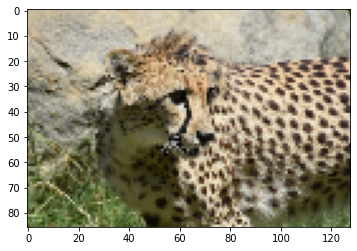

In [8]:
import random
r = random.randint(0, len(img_paths))

plt.imshow(dataX[13320] / 255.0)
#plt.title(label_list[int(dataY[r])])

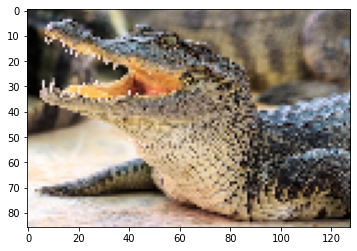

In [36]:
plt.imshow(dataX[11062] / 255.0)

Text(0.5, 1.0, 'Path: dataset/animal_Alligator/9.jpg')

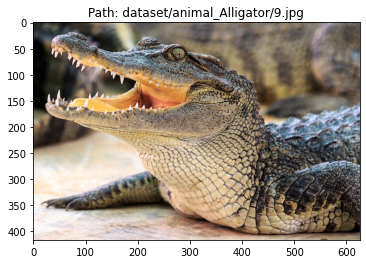

In [37]:
from PIL import Image

img = Image.open(img_paths[11062])
plt.imshow(img)
plt.title(f'Path: {img_paths[11062]}')

In [ ]:
import pandas as pd
import os

In [ ]:
txtlists = os.listdir('drive/MyDrive/Image Retrieval/Database')

In [ ]:
txtlists = sorted(list(filter(lambda x: x.endswith('.txt') ,txtlists)))

In [ ]:
df = pd.DataFrame({'Text_Label': txtlists})
df

,Text_Label
0,animal_Alligator.txt
1,animal_Alpaca.txt
2,animal_Anteater.txt
3,animal_Ants.txt
4,animal_Bats.txt
...,...
129,scenery_savannah.txt
130,scenery_sky.txt
131,scenery_valley.txt
132,scenery_volcano.txt


In [ ]:
df.to_csv(r'drive/MyDrive/Image Retrieval/Text_Labels.csv', sep='\t', encoding='utf-8', header='true')